## Heba Allah Emad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

## Reading Data

In [2]:
df_train=pd.read_csv('Train_mini.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df_test=pd.read_csv('Test_mini.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## Preprocessing

In [4]:
print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)

Training data shape: (8523, 12)
Testing data shape: (5681, 11)


In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
df_train.duplicated().sum()

0

In [14]:
df_test.duplicated().sum()

0

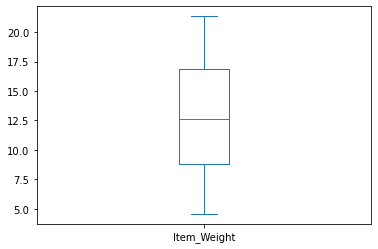

In [15]:
df_train.Item_Weight.plot(kind='box')
pyplot.show()

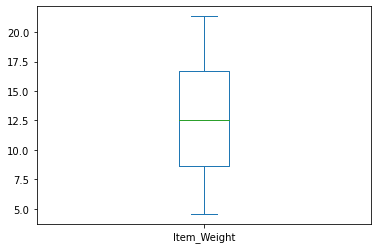

In [16]:
df_test.Item_Weight.plot(kind='box')
pyplot.show()

In [17]:
##we will use mean fillna in iteam_weight because it's quantitative data and normal
df_train.Item_Weight.fillna(df_train.Item_Weight.mean(),inplace=True)
df_test.Item_Weight.fillna(df_test.Item_Weight.mean(),inplace=True)

In [18]:
## But for outlet_size will use mode fillna because it's qualitative and nominal data
df_train.Outlet_Size.fillna(df_train.Outlet_Size.mod,inplace=True)
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df_test.Outlet_Size.fillna(df_test.Outlet_Size.mod,inplace=True)
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [20]:
print(df_train.Item_Fat_Content.value_counts())
print(df_test.Item_Fat_Content.value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


In [21]:
df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

What is the Item_Type made maximum sales?

In [22]:
item_sales = df_train.groupby('Item_Type')['Item_Outlet_Sales'].sum()

# Find the Item_Type with the maximum sales
max_sales_item_type = item_sales.idxmax()

print(f"The Item_Type with the maximum sales is: {max_sales_item_type}")

The Item_Type with the maximum sales is: Fruits and Vegetables


Determine if the location has an effect on sales or not 

In [23]:
location_sales = df_train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

# Print the average sales for each location type
print(location_sales)

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64


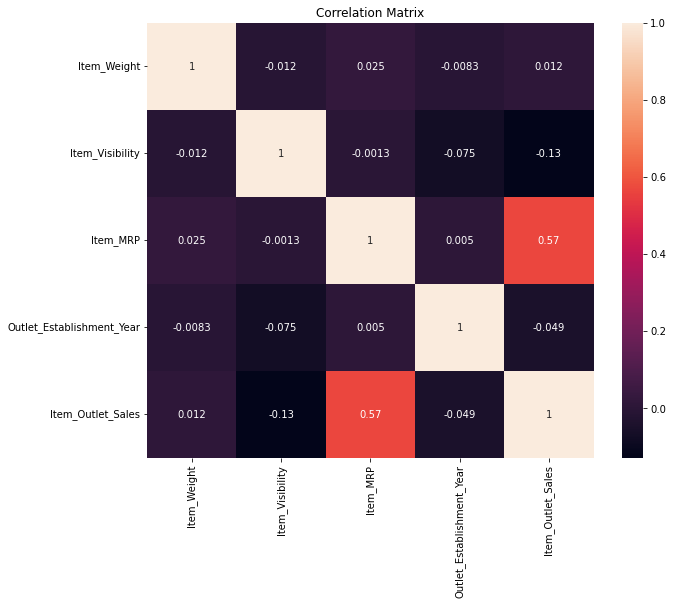

In [24]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

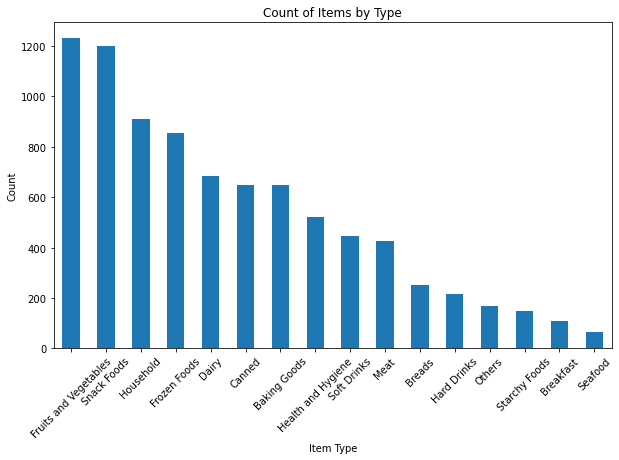

In [26]:
plt.figure(figsize=(10, 6))
df_train['Item_Type'].value_counts().plot(kind='bar')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Count of Items by Type')
plt.xticks(rotation=45)
plt.show()

In [37]:
sales_fat = df_train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().reset_index()
sales_fat

,Item_Fat_Content,Item_Outlet_Sales
0,Low Fat,1.190409e+07
1,Regular,6.687031e+06


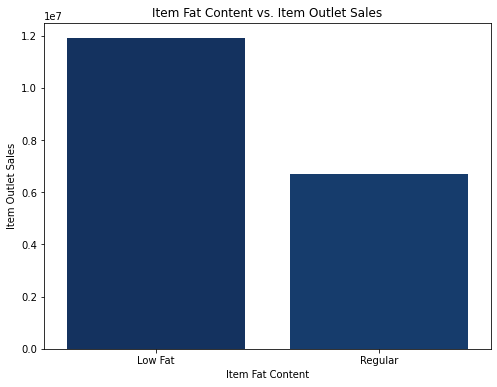

In [47]:
plt.figure(figsize=(8, 6))
colors = plt.cm.Blues(np.linspace(1, 0.2, 20))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=sales_fat ,palette=colors)
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.title('Item Fat Content vs. Item Outlet Sales')
plt.show()

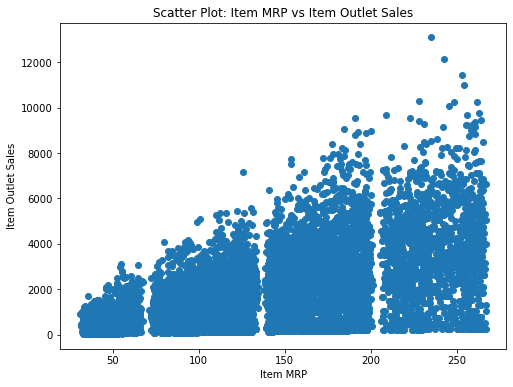

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df_train['Item_MRP'], df_train['Item_Outlet_Sales'])
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Item MRP vs Item Outlet Sales')
plt.show()

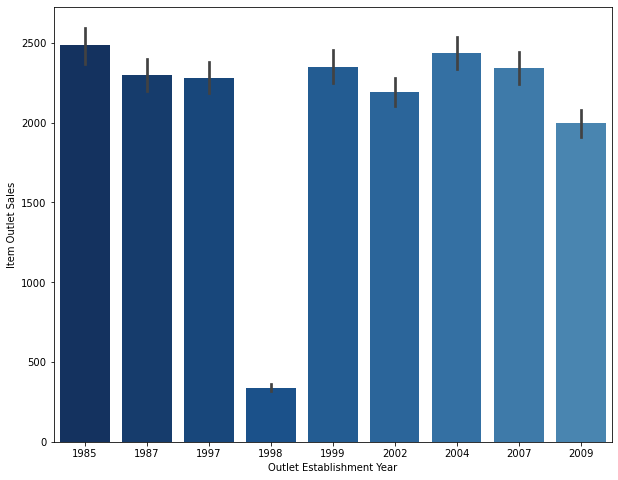

In [49]:
plt.figure(figsize=(10, 8))
colors = plt.cm.Blues(np.linspace(1, 0.2, 20))
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df_train , palette=colors)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.show()

### Feature Engineering

In [50]:
# It can help identify any pricing patterns or discrepancies based on the item's weight.
df_train['Item_Price_Per_Weight'] = df_train['Item_MRP'] / df_train['Item_Weight']

In [51]:
df_test['Item_Price_Per_Weight'] = df_test['Item_MRP'] / df_test['Item_Weight']

### preparing data for prediction 

In [52]:
from sklearn.model_selection import train_test_split

x = df_train.drop('Item_Outlet_Sales', axis=1)
y = df_train['Item_Outlet_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


## Encoding and Modeling

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define the preprocessing steps for categorical and numerical variables
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Define the transformers for encoding and scaling
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()
# Create the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error

pipeline_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline_linear.fit(x_train, y_train)
y_pred = pipeline_linear.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 811.8729854365575


In [69]:
y_pred 

array([1323.1404758 ,  777.76350696,  840.61655175, ..., 1099.00220127,
       2176.63045315, 3891.29528072])

In [70]:
from sklearn.ensemble import RandomForestRegressor

pipeline_RFR = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline_RFR.fit(x_train, y_train)
y_pred = pipeline_RFR.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 794.0701221228001


In [71]:
y_pred 

array([ 777.780902,  929.39022 ,  453.829254, ...,  553.885678,
       1554.596394, 5275.839148])

In [72]:
from sklearn.tree import DecisionTreeRegressor

pipeline_decision = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=5))  
])

pipeline_decision.fit(x_train, y_train)
y_pred = pipeline_decision.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 743.5350340138135


In [73]:
y_pred 

array([1144.53397857,  732.7682094 ,  732.7682094 , ...,  526.81343805,
       2019.44790497, 3599.13156894])

In [74]:
from xgboost import XGBRegressor
pipeline_XGB = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1))  # Specify the number of estimators and learning rate
])

pipeline_XGB.fit(x_train, y_train)
y_pred = pipeline_XGB.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 757.2004812162386


In [75]:
y_pred 

array([1114.5531 ,  782.7327 ,  701.04236, ...,  481.40073, 2040.0658 ,
       4147.073  ], dtype=float32)

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline_Gradient = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1))  
])

pipeline_Gradient.fit(x_train, y_train)
y_pred = pipeline_Gradient.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 742.8519185396891


In [77]:
y_pred 

array([1225.81389654,  733.6472578 ,  733.34328548, ...,  402.29373972,
       2045.79961541, 3904.27678468])

## Saving Final model

In [78]:
x_test = df_test

# Make predictions on the test dataset
y_pred = pipeline_Gradient.predict(x_test)

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Item_Outlet_Sales': y_pred})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions_BigMart.csv', index=False)

In [79]:
predictions=pd.read_csv('predictions_BigMart.csv')
predictions

,Item_Outlet_Sales
0,1586.238062
1,1307.513915
2,579.399829
3,2538.248696
4,6400.926650
...,...
5676,2207.885767
5677,2460.775554
5678,1913.508200
5679,3907.545843


In [ ]:
df_test_with_predictions = pd.concat([df_test, predictions], axis=1)

# Display the updated DataFrame
df_test_with_predictions